# Cluster Analysis

This notebook details the process of clustering the different financial institutions in the West African Economic and Moetary Union (UEMOA). Initially I thought of clustering the menber countries themselves but given they are just 8 and posses quite a diverse economic landscape, I thought it would be more effective if I concentrated efforts on the financial insitutions in the countries themselves.

### Analysis Plan

1. Definition of the analysis goal and selecting the most significant variables
2. Processing the numerical variables 
3. Selecting clustering procedure
4. Selecting method for data aggregation
5. Choosing the unit of measure or algorithm for the distance between entities
6. Identification of optimum number of clusters
7. Generating the clusters

## 1. Definition of the analysis goal and selecting the most significant variables

### Goal of the analysis

The goal of the present analysis is to identify resembling credit institutions, which can be included into homogenous groups, according to a series of prudential and profitability indicators. Our study aims to provide an alternative to the peer group 
techniques, implemented by supervisory authorities in the process of off-site surveillance.

According to this technique, credit institutions are, firstly, grouped by size or volume of activity, and then, for each group, are made comparative analyses between the current values of financial indicators and the previous ones. The 
disadvantage stems from the fact that this method cannot signal the impairment in the financial condition of the whole group, but only the distress of a particular credit institution in that group.

Unlike it, cluster analysis, as an exploratory technique, allows the comparisons between all credit institutions in the sample, classifying them into a certain group, according to the similarities identified. The core principle of this technique is that of minimization of the variance between the components of a group, simultaneously with the maximization of the variance across groups. In this way, one can notice the degree of group stability over time.

### Metrics in the analysis

The study is being conducted for the period between 2013 and 2019 with data collected from 106 banks on an annual basis.

- Countries_Num: Numeric code representing the 8 countries in the West African Economic and Monetary Union (ranges from 1 to 8).

- id: An identifier for each bank in the dataset.

- Countries: Categorical variable indicating the names of the countries in the West African Economic and Monetary Union.

- Banks: Categorical variable representing the names of the banks within the specified countries.

- Year: Integer variable indicating the year in which the data was recorded.

- RIR (Risk Index Rating): A measure assessing the level of risk associated with financial institutions.

- SFS (Solvency and Financial Stability): A metric indicating the financial health and stability of the banks.

- INF (Inflation Rate): Represents the inflation rate, a measure of the general rise in prices over a period of time.

- ERA (Economic Risk Assessment): An evaluation of the potential economic risks within the banking sector.

- INL (Internationalization Level): Indicates the extent to which banks are involved in international activities.

- Zscore: A metric used as a measure of a bank's financial health and the likelihood of it going bankrupt in the next two years.

- DEBT (Debt Level): Represents the amount of debt held by the banks.

- SIZE: Represents the size of the banks, typically measured by total assets or other relevant financial metrics.

- CC (Capital Adequacy): A measure of a bank's capital in relation to its risk-weighted assets.

- GE (Governance and Ethics): Evaluates the governance practices and ethical standards within the banking institutions.

- PS (Profitability and Sustainability): Assesses the profitability and sustainability of the banks.

- RQ (Regulatory Compliance): Measures the extent to which banks adhere to regulatory requirements.

- RL (Liquidity Risk): Evaluates the risk associated with a bank's ability to meet its short-term obligations.

- VA (Value Added): Indicates the value added by the banks to the overall economic environment.

In [1]:
#loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#block out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#loading the data set 
uemoa_df = pd.read_csv('uemoa_banking.csv')
uemoa_df.head(2)

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,1,1,Bénin,Banque Atlantique Bénin,2014,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286


In [5]:
uemoa_df.dtypes

Countries_Num      int64
id                 int64
Countries         object
Banks             object
Year               int64
RIR              float64
SFS              float64
INF              float64
ERA              float64
INL              float64
Zscore           float64
DEBT             float64
SIZE             float64
CC               float64
GE               float64
PS               float64
RQ               float64
RL               float64
VA               float64
dtype: object

In [3]:
#list of columns in the dataset
uemoa_df.columns

Index(['Countries_Num', 'id', 'Countries', 'Banks', 'Year', 'RIR', 'SFS',
       'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ',
       'RL', 'VA'],
      dtype='object')

In [6]:
uemoa_df.isnull().sum()

Countries_Num    0
id               0
Countries        0
Banks            0
Year             0
RIR              0
SFS              0
INF              0
ERA              0
INL              0
Zscore           0
DEBT             0
SIZE             0
CC               0
GE               0
PS               0
RQ               0
RL               0
VA               0
dtype: int64

In [20]:
#number of unique banks in the dataset
unique_banks_per_country = uemoa_df.groupby('Countries')['Banks'].nunique()
unique_banks_per_country

Countries
 Togo            12
Burkina Faso     13
Bénin            11
Côte d'Ivoire    23
GUINEE-BISSAU     3
Mali             13
Niger            11
Sénégal          20
Name: Banks, dtype: int64

**Available metrics for the analysis**

In [7]:
metrics = ['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']
uemoa_df[metrics].head()

,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286
2,4.266334,30.984761,0.218786,2.394557,8.583933,0.649069,30.900230,12.511530,33.17308,30.28846,45.23809,30.76923,33.65385,58.62069
3,4.580100,29.832095,-0.794050,3.712403,5.720476,0.846807,35.923350,12.599141,34.13462,33.65385,47.14286,30.28846,30.76923,60.09852
4,7.329021,28.630991,1.769412,3.833422,6.256669,0.599062,39.598463,12.706508,33.17308,26.44231,47.14286,33.17308,30.28846,58.12808


## 2. Processing the Metrics

**Reviewing the data for outliers**

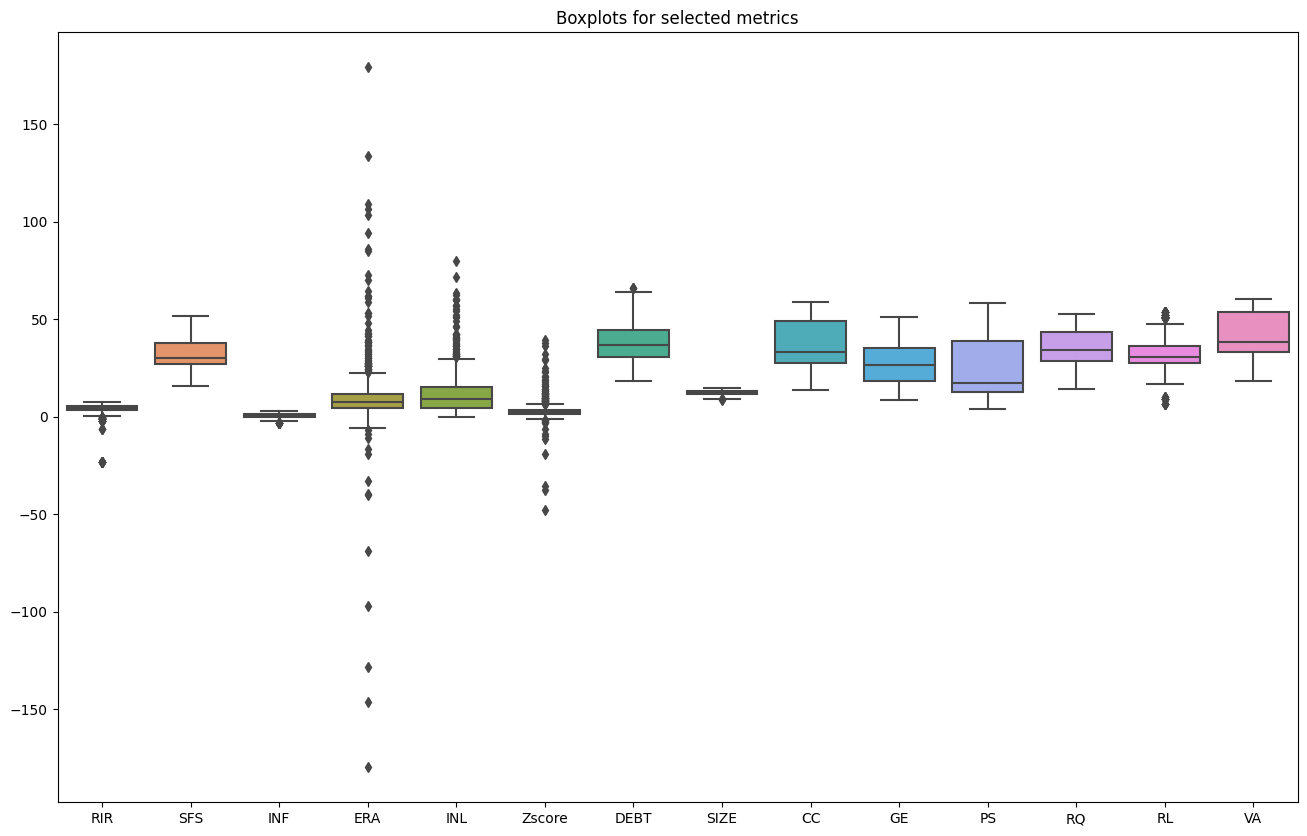

In [10]:
# Visualize the distribution of selected metrics using boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=uemoa_df[metrics], orient='v')
plt.title('Boxplots for selected metrics')
plt.show()

The chart indicates that some of the metrics possess outliers and are not normally distributed so we'll use Z score to standardize the data as it will be more robust and is not as sensitive to extreme values

**Standardizing the data**

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
standardized_features = scaler.fit_transform(uemoa_df[metrics])

# Replace the original features with the standardized ones in your dataset
uemoa_df[['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore',
          'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']] = standardized_features
uemoa_df.head()

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,0.030398,-0.619813,-0.075473,-0.346668,0.038999,-0.389639,-1.739593,0.130214,-1.005347,0.996544,2.335223,0.212167,0.159764,1.337081
1,1,1,Bénin,Banque Atlantique Bénin,2014,0.459313,-0.242886,-0.846236,-0.354656,-0.254408,-0.365178,-1.415444,0.173776,-0.594954,0.907887,1.578303,-0.441714,0.335980,1.452254
2,1,1,Bénin,Banque Atlantique Bénin,2015,0.134925,-0.119084,-0.241115,-0.388977,-0.282077,-0.452934,-0.676080,0.389507,-0.327455,0.345281,1.449009,-0.492493,0.098724,1.585820
3,1,1,Bénin,Banque Atlantique Bénin,2016,0.211243,-0.259080,-1.039621,-0.319443,-0.545310,-0.414311,-0.245139,0.468157,-0.251027,0.673468,1.578303,-0.543273,-0.185985,1.719387
4,1,1,Bénin,Banque Atlantique Bénin,2017,0.879869,-0.404959,0.981377,-0.313058,-0.496019,-0.462702,0.070154,0.564543,-0.327455,-0.029789,1.578303,-0.238594,-0.233437,1.541298


#### Handling of outliers

During exploratory data analysis (EDA), I discovered that most of the outliers in the data could be explained by changes in the security, political or economic landscape of particular countries in the UEMOA block. These occurences are not rare or new and history suggests the chances of these events occuring can not be ignored.

For that reason eliminating the outliers or even reducing their impact risks creating a big divide between the theory of the analysis and the practicality of the financial landscape in the UEMOA countries. However, leaving them as they are can also present an unrealistic view beacuse of the ectremity of some of the ouliers.
Perhaps the best course of action is to perform senstivity analysis to assess how different treatments of outliers impact the results. So we'll consider the treatments below;


1. **Not Treating Outliers at All:**
   - **Advantages:**
     - Preserves the original data, allowing for a more accurate representation of extreme events.
     - Maintains the real-world context and practicality of the financial landscape.
   - **Considerations:**
     - The impact of extreme values may dominate the analysis, affecting the interpretability of results.
     - Sensitivity to outliers may vary across clustering algorithms.

2. **Winsorizing:**
   - **Advantages:**
     - Mitigates the influence of extreme values by capping them at a certain percentile.
     - Maintains a degree of realism while reducing the impact of outliers.
   - **Considerations:**
     - Choosing an appropriate percentile for Winsorization may require careful consideration.
     - It may not be suitable if outliers provide critical insights into the financial landscape.

3. **Using a Log Scale:**
   - **Advantages:**
     - Log transformation can compress the range of extreme values, making the distribution more symmetric.
     - Useful for data with a positive skewness.
   - **Considerations:**
     - Appropriate for metrics with positive values; not suitable for zero or negative values.
     - May not fully address extreme values in cases of high variability.

4. **Outlier Labeling:**
   - **Advantages:**
     - Recognizes and distinguishes outliers as a separate category.
     - Allows for the inclusion of extreme events without directly influencing clustering.
   - **Considerations:**
     - Interpretation becomes critical, and the impact of outliers needs to be assessed in the context of the analysis.
     - Some clustering algorithms may not handle labeled outliers effectively.

5. **Eliminating Outliers:**
   - **Advantages:**
     - Provides a clean dataset for clustering, reducing the influence of extreme values.
     - May enhance the interpretability of clusters.
   - **Considerations:**
     - Loss of potentially valuable information about extreme events.
     - The potential for a divide between the theoretical analysi
    
Given the context of the financial landscape in UEMOA countries, outlier labeling aligns well with the goal of capturing and understanding extreme events without completely removing them from the analysis. However, it's important to conduct sensitivity analyses and carefully interpret the results to ensure that the labeled outliers contribute meaningfully to the overall insights.l strengthen the credibility of your findings.

#### Labeling of Outliers

Display standardized boxplot

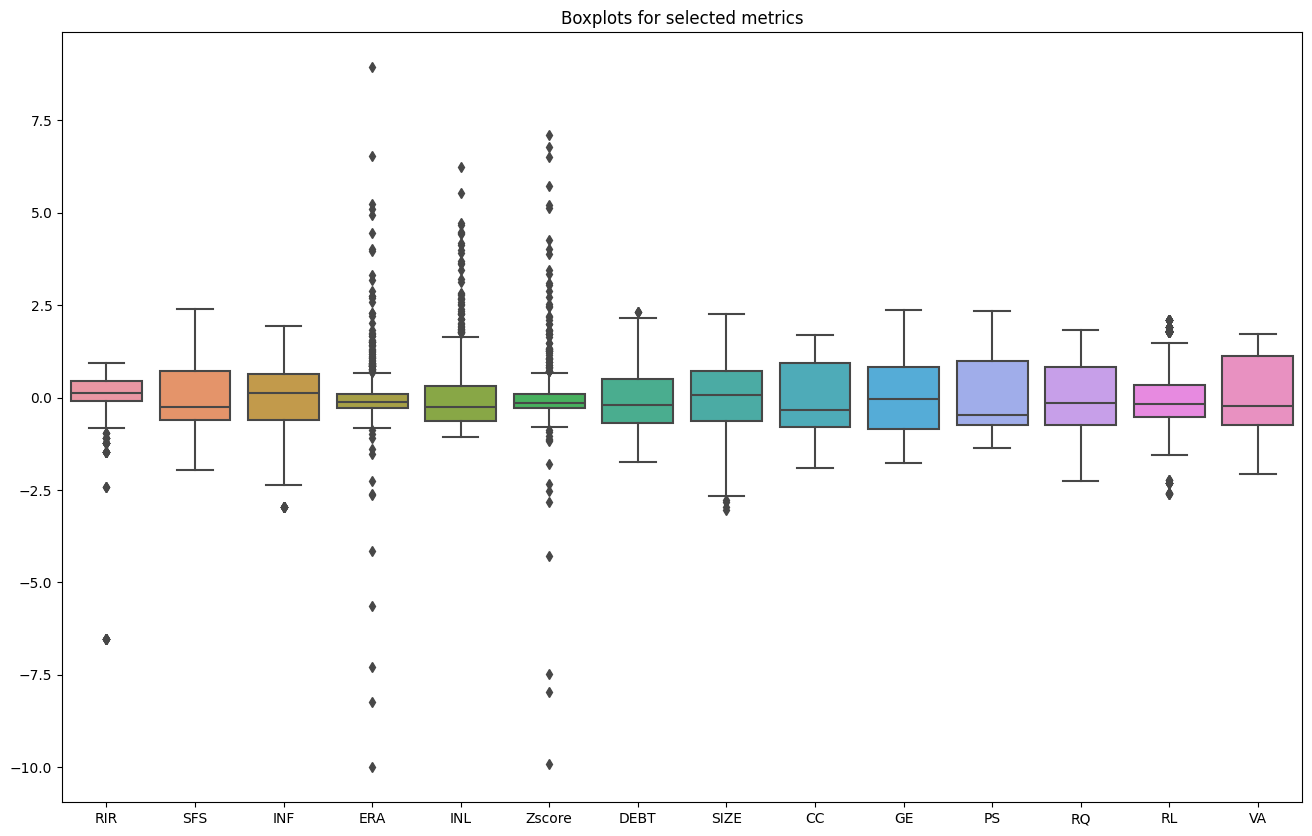

In [22]:
# Visualize the distribution of selected metrics using boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=uemoa_df[metrics], orient='v')
plt.title('Boxplots for selected metrics')
plt.show()

#### Assigning thresholds to metrics

In [35]:
# Define thresholds for positive and negative outliers for each metric
thresholds = {
    'RIR': {'positive': 1.0, 'negative': -1.0},
    'INF': {'positive': 2.0, 'negative': -1.5},
    'ERA': {'positive': 0.6, 'negative': -0.4},
    'INL': {'positive': 0.85, 'negative': -0.8},
    'Zscore': {'positive': 0.5, 'negative': -0.5},
    'RL': {'positive': 1.0, 'negative': -2.0},
}

# Create a new column 'Outlier_Label' and initialize it with 'Not Outlier'
uemoa_df['Outlier_Label'] = 'Not Outlier'

# Assign 'Outlier' label based on positive and negative thresholds for each metric
for metric, threshold_values in thresholds.items():
    positive_outlier_criteria = uemoa_df[metric] > threshold_values['positive']
    negative_outlier_criteria = uemoa_df[metric] < threshold_values['negative']

    uemoa_df.loc[positive_outlier_criteria, 'Outlier_Label'] = 'Positive Outlier'
    uemoa_df.loc[negative_outlier_criteria, 'Outlier_Label'] = 'Negative Outlier'

# Display the updated DataFrame
display(uemoa_df[['Countries', 'Banks', 'RIR', 'INF','ERA', 'INL', 'Zscore', 'RL', 'Outlier_Label']])


,Countries,Banks,RIR,INF,ERA,INL,Zscore,RL,Outlier_Label
0,Bénin,Banque Atlantique Bénin,0.030398,-0.075473,-0.346668,0.038999,-0.389639,0.159764,Not Outlier
1,Bénin,Banque Atlantique Bénin,0.459313,-0.846236,-0.354656,-0.254408,-0.365178,0.335980,Not Outlier
2,Bénin,Banque Atlantique Bénin,0.134925,-0.241115,-0.388977,-0.282077,-0.452934,0.098724,Not Outlier
3,Bénin,Banque Atlantique Bénin,0.211243,-1.039621,-0.319443,-0.545310,-0.414311,-0.185985,Not Outlier
4,Bénin,Banque Atlantique Bénin,0.879869,0.981377,-0.313058,-0.496019,-0.462702,-0.233437,Not Outlier
...,...,...,...,...,...,...,...,...,...
737,Togo,Union Togolaise de Banque,-0.509179,1.623512,-0.261709,-0.690562,-0.313455,-0.945208,Not Outlier
738,Togo,Union Togolaise de Banque,-6.530678,0.599668,-0.321449,0.040352,0.179932,-0.233437,Negative Outlier
739,Togo,Union Togolaise de Banque,0.459058,-1.186449,-0.623237,-0.665835,-0.934293,-0.755402,Negative Outlier
740,Togo,Union Togolaise de Banque,-1.242547,0.318154,-0.885590,-0.641248,-1.045439,-0.328340,Negative Outlier


#### Checking distribution of outliers

In [64]:
uemoa_df_filtered['Outlier_Label'].value_counts()

Outlier_Label
Not Outlier         275
Positive Outlier    249
Negative Outlier    218
Name: count, dtype: int64

#### Checking the metrics for correlation 

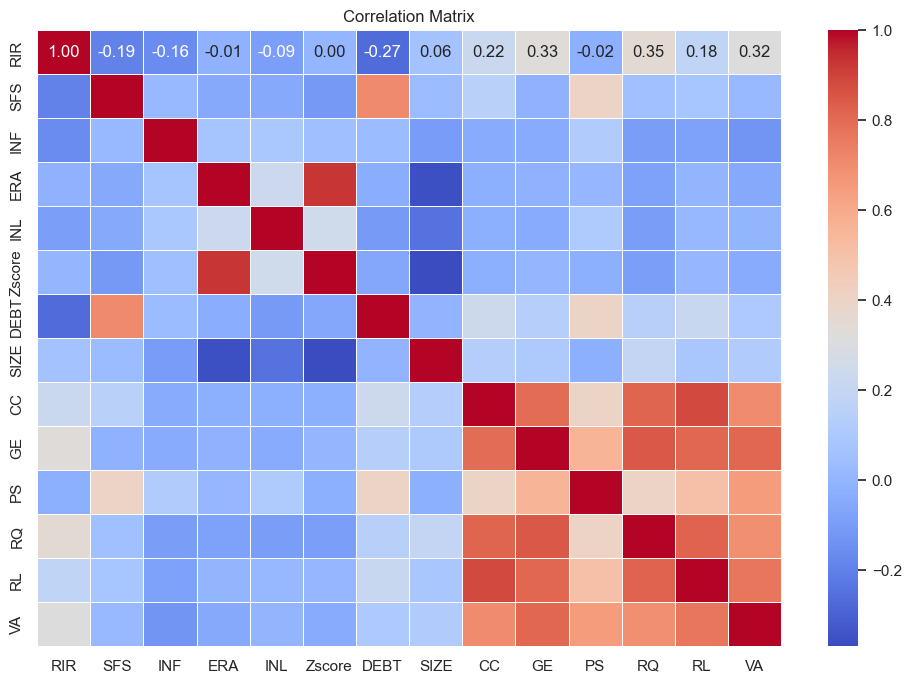

In [40]:
# calculate the correlation matrix
correlation_matrix = uemoa_df[metrics].corr()

# visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

Have decided to exclude from our metrics those variables that show a high correlation with other variables to avoid biased 
results

In [46]:
# Identify highly correlated pairs
high_corr_pairs = (correlation_matrix.abs() > 0.8) & (correlation_matrix < 1.0)

# Get the names of the highly correlated variables
high_corr_variables = [(var1, var2) for var1 in correlation_matrix.columns
                       for var2 in correlation_matrix.columns
                       if high_corr_pairs.loc[var1, var2]]
print("Highly Correlated Variables:")
for pair in high_corr_variables:
    print(pair)

Highly Correlated Variables:
('ERA', 'Zscore')
('Zscore', 'ERA')
('CC', 'RQ')
('CC', 'RL')
('GE', 'RQ')
('GE', 'RL')
('GE', 'VA')
('RQ', 'CC')
('RQ', 'GE')
('RQ', 'RL')
('RL', 'CC')
('RL', 'GE')
('RL', 'RQ')
('VA', 'GE')


In [51]:
to_remove = ['ERA', 'RQ', 'RL', 'GE']
# removing highly correlated variables
uemoa_df_filtered = uemoa_df.drop(columns=to_remove)
# display remaining metrics
uemoa_df_filtered.columns

Index(['Countries_Num', 'id', 'Countries', 'Banks', 'Year', 'RIR', 'SFS',
       'INF', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'PS', 'VA',
       'Outlier_Label'],
      dtype='object')

## 3. Selecting clustering procedure

The clustering procedure we have chosen is Agglomerative Hierarchical 
clusterin;; because it allows the grouping of resembling banks, withoue a pre-established number of clusters. The agglomerative technique places, firstly, 
each credit institution into a distinct group, then proceeds to their merger int 
successively larger clusters, according to the agglomerative method cho.

Agglomerative Clustering progressively merges clusters based on pairwise distances, forming a hierarchical structure that can be visually represented as a dendrogram. The algorithm is flexible and effective for exploratory analysis, providing insights into the natural grouping of data points.sen

## 4. Selecting method for data aggregation
We will apply 3 methods comparatively ;

- Single linkage. Determines the distance between two clusters by the distance of the two closest objects in the different clusters (nearest neighbor).
  
- Complete linkage. Joins two clusters characterized by the greatest distance between any two objects in the different clusters (furthest neighbor). This method is usually employed when the entities actually form naturally distinctive groups.
  
- Centroid clustering. Statutes that the distance between two clusters is determined as the difference between their centroids, the centroid being the average point in the multidimensional space of a cluster.

Each linkage method has its own characteristics and is suitable for diffrent types of data or cluster structures. 
For example, to form compact well-separated clusters, complete linkage is a good choice. To emphasize connectivity between points, single linkage could be appropriate. If looking for a balance and less sensitivity to outliers, centroid clustering is a suitable option.

## 5. Choosing the unit of measurement for the distance between entities.
As a measure for the distance between credit institutions, we have decided to employ the squared Euclidean distance because, in the process of group building, the distinction between them is made according to the characteristics of the outlier banks. 
The studies of Wolfson (2004), Gutierrez and Sorensen (2006) propose the same approach.

## 6. Identification of optimum number of clusters

#### With all the outliers present

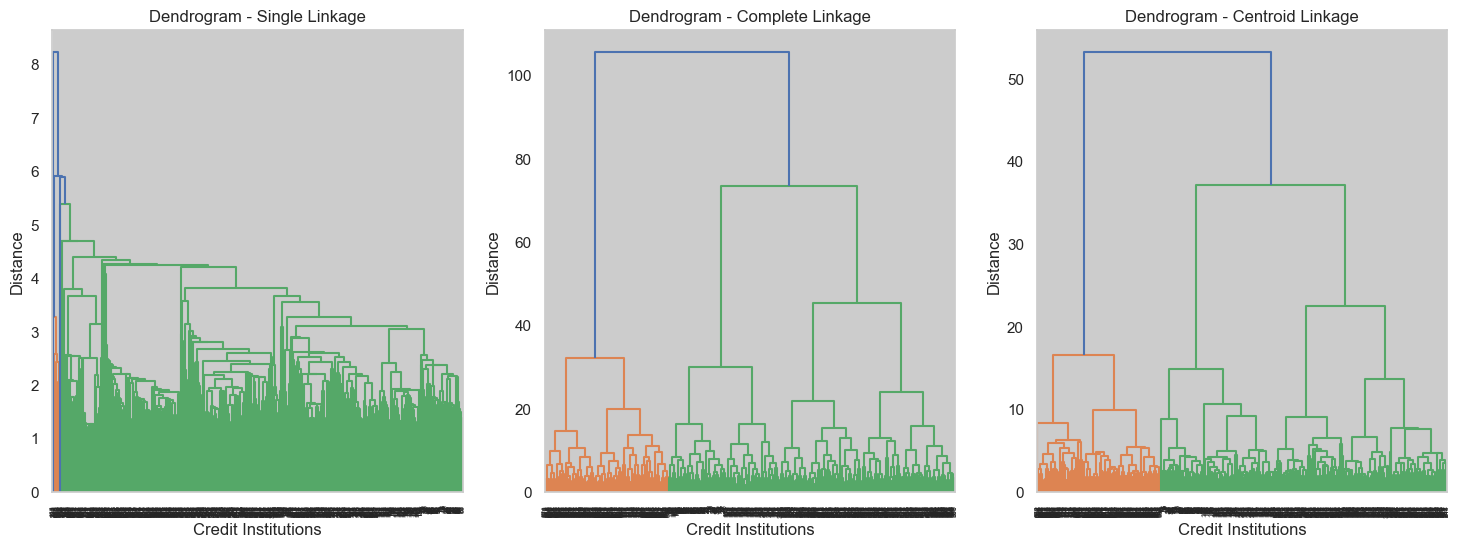

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = uemoa_df_filtered
# removing text data
data = data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])
linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()


Single Linkage: This method has many branches indicating a large number of clusters at lower distance levels.

Complete Linkage: This method shows fewer, more distinct clusters compared to the single linkage method.

Centroid Linkage: This method also displays distinct clusters similar to complete linkage but with variations in cluster formations and distances.

#### Check for optimum number of clusters without the outliers

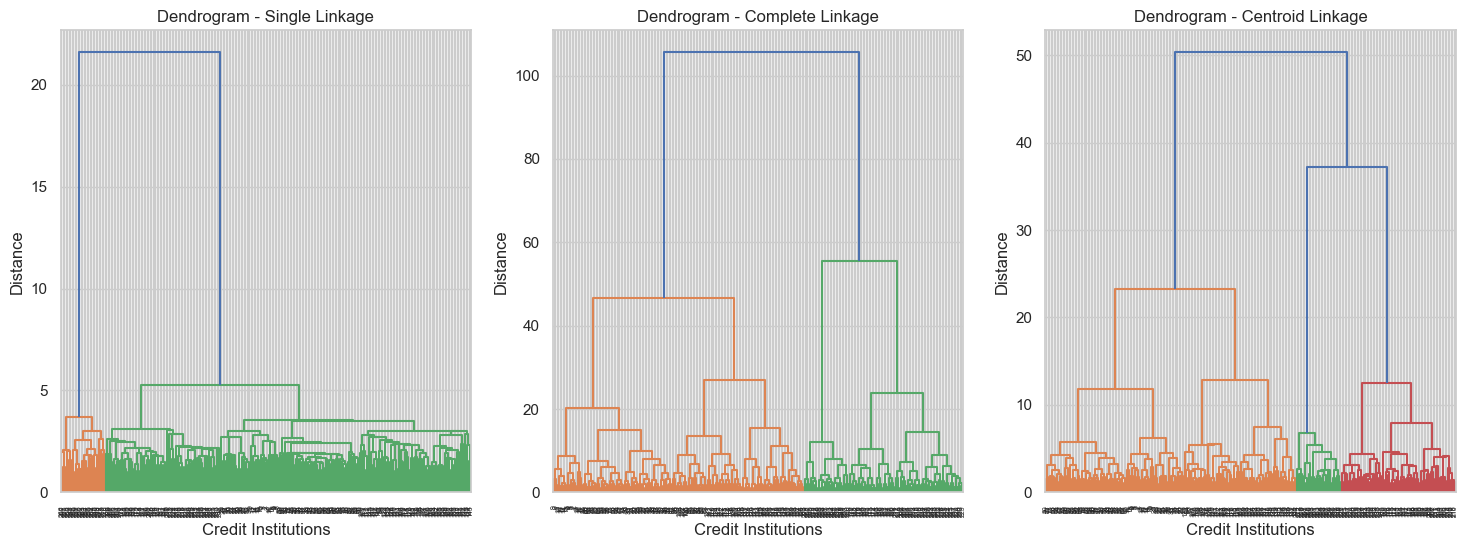

In [65]:
# Remove rows with outliers for clustering
cleaned_data = uemoa_df[(uemoa_df_filtered['Outlier_Label'] == 'Not Outlier')]

# Select only the metrics columns for clustering
data = cleaned_data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])

linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Use the cleaned data without outliers for clustering
    linkage_matrix = linkage(data, method=method)

    # Plot the dendrogram
    dendrogram(linkage_matrix)
    
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()


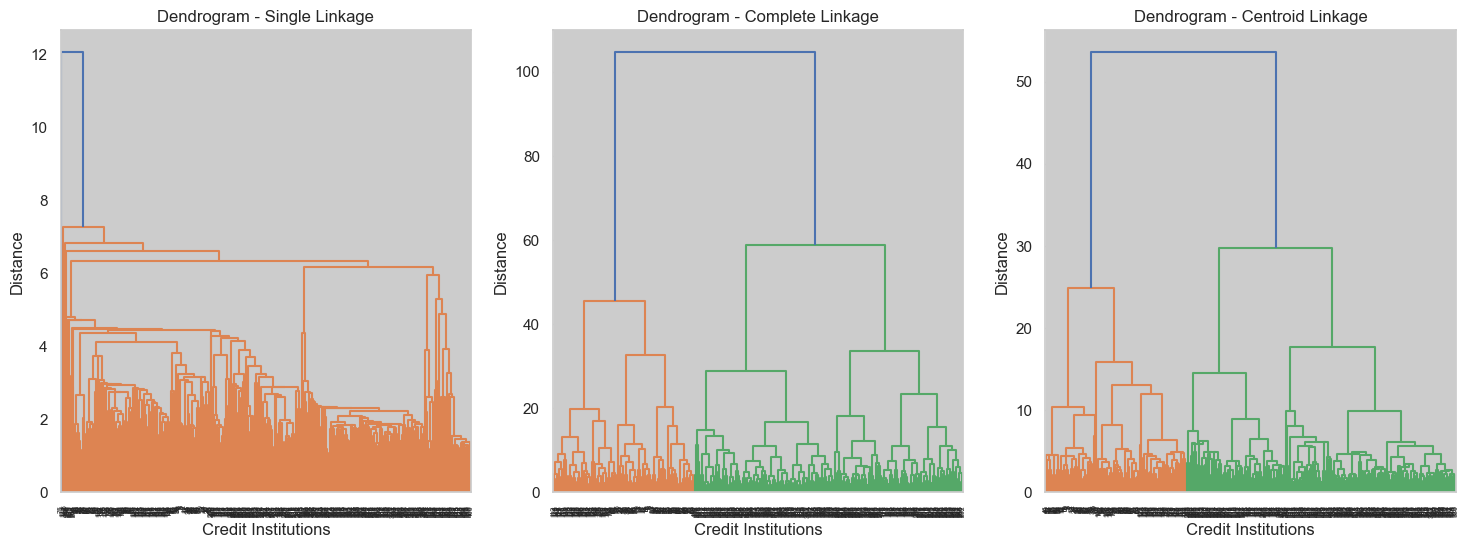

In [66]:
# Remove rows with outliers for clustering
cleaned_data = uemoa_df[(uemoa_df_filtered['Outlier_Label'] != 'Not Outlier')]

# Select only the metrics columns for clustering
data = cleaned_data.drop(columns= ['Countries', 'Banks', 'Outlier_Label'])

linkage_methods = ['single', 'complete', 'centroid']

# Create subplots for each linkage method
plt.figure(figsize=(18, 6))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Use the cleaned data without outliers for clustering
    linkage_matrix = linkage(data, method=method)

    # Plot the dendrogram
    dendrogram(linkage_matrix)
    
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Credit Institutions')
    plt.ylabel('Distance')

plt.show()
